<a href="https://colab.research.google.com/github/avalosmarco/portafolioMarco/blob/main/modulo6_actividad3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  ACTIVIDAD FORMATIVA – REGRESIÓN LINEAL CON DATOS DE VIVIENDAS

## ¿Cuánto vale esta casa?
Esta actividad te guiará paso a paso para construir y evaluar un modelo de regresión lineal que prediga el precio de una casa en base a sus características. Usa este cuaderno para ejecutar código, responder preguntas y entregar tus resultados.

## ✅ Paso 1: Cargar el dataset

Cargar el archivo `house_prices.csv` con las siguientes columnas: `Home`, `Price`, `SqFt`, `Bedrooms`, `Bathrooms`, `Offers`, `Brick`, `Neighborhood`.

In [ ]:
# Paso 1: Subir el archivo CSV desde tu computador
from google.colab import files
uploaded = files.upload()  # Se abrirá un cuadro para seleccionar el archivo local (ej. precios_casas.csv)

# Paso 2: Importar librerías necesarias
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

# Paso 3: Leer el archivo subido
df = pd.read_csv("house-prices.csv")

Saving house-prices.csv to house-prices.csv


## Paso 2: Selección de variables y partición

Vamos a usar `SqFt` como variable predictora (tamaño en pies cuadrados) y `Price` como variable objetivo (precio).

In [ ]:
from sklearn.model_selection import train_test_split

# Definir X e y
# INGRESA TU CODIGO ACÁ
# Definir X (predictora) e y (objetivo)
X = df[['SqFt']]  # Variable independiente (debe ser un DataFrame 2D)
y = df['Price']    # Variable dependiente

# Dividir en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Paso 3: Entrenamiento del modelo

In [ ]:
from sklearn.linear_model import LinearRegression

# Instanciar y entrenar el modelo
# INGRESA TU CODIGO ACÁ
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir precios con el conjunto de prueba
y_pred = model.predict(X_test)

# Realizar predicciones
# INGRESA TU CODIGO ACÁ

## 📈 Paso 4: Visualización de la recta de regresión

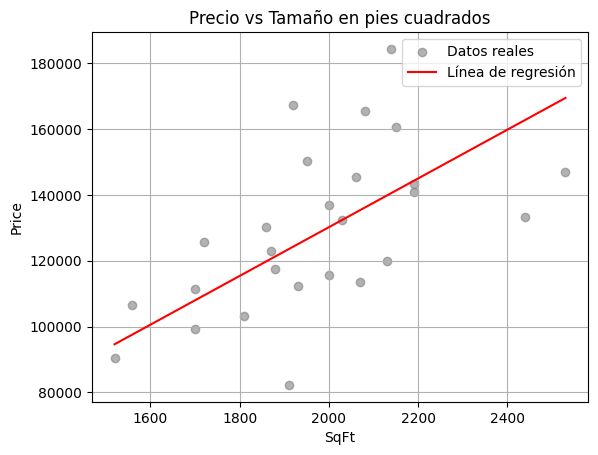

In [ ]:
import matplotlib.pyplot as plt

order = X_test.squeeze().argsort()
plt.scatter(X_test, y_test, color='gray', alpha=0.6, label='Datos reales')
plt.plot(X_test.iloc[order], y_pred[order], color='red', label='Línea de regresión')
plt.title("Precio vs Tamaño en pies cuadrados")
plt.xlabel("SqFt")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

##  Paso 5: Cálculo de métricas

In [ ]:
# Importar funciones para calcular métricas de evaluación de modelos
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np  # Para operaciones numéricas como raíz cuadrada

# Importar funciones para calcular métricas
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calcular métricas
mae = mean_absolute_error(y_test, y_pred)  # Error Absoluto Medio (en unidades originales)
mse = mean_squared_error(y_test, y_pred)   # Error Cuadrático Medio (penaliza errores grandes)
rmse = np.sqrt(mse)                        # Raíz del Error Cuadrático Medio (interpretable en unidades originales)
r2 = r2_score(y_test, y_pred)              # Coeficiente de Determinación R²

# Mostrar resultados con formato
print("Evaluación del modelo:")
print(f"MAE : {mae:,.0f}")       # Ejemplo: "MAE : 25,000" (dólares/pesos de diferencia promedio)
print(f"MSE : {mse:,.0f}")       # Ejemplo: "MSE : 1,000,000,000" (unidades al cuadrado)
print(f"RMSE: {rmse:,.0f}")      # Ejemplo: "RMSE: 31,623" (similar a MAE pero más sensible a outliers)
print(f"R²  : {r2:.3f}")         # Ejemplo: "R²  : 0.750" (75% de la variabilidad es explicada por el modelo)



Evaluación del modelo:
MAE : 15,946
MSE : 415,765,841
RMSE: 20,390
R²  : 0.295


## Paso 6: Reflexión
Responde con tus propias palabras:

**1. ¿Qué nos dice el MAE sobre el modelo?**
  
  Interpretación: El MAE (Mean Absolute Error) de 15,946 indica que, en promedio, las predicciones del modelo se desvían $15,946 dólares del precio real de las casas.

  Contexto: Es una métrica fácil de entender porque está en las mismas unidades que la variable objetivo (Price). Un MAE alto sugiere que el modelo tiene errores considerables en sus predicciones.

**2. ¿Es útil el RMSE en este contexto? ¿Por qué?**
  
  Sí, es útil porque:

  RMSE (Root Mean Squared Error) = 20,390 penaliza más los errores grandes (outliers) que el MAE. Esto es relevante en precios de viviendas, donde una predicción muy incorrecta puede ser costosa.

  Al estar en las mismas unidades que Price, permite comparación directa con el MAE. Aquí, el RMSE es mayor que el MAE, lo que sugiere la presencia de algunos errores grandes en las predicciones.

**3. ¿Qué indica el valor de R² obtenido?**

  R² = 0.295 significa que solo 29.5% de la variabilidad en los precios de las casas es explicada por el tamaño (SqFt).

  Implicaciones: El modelo actual es limitado, ya que el 70.5% de la variación en Price depende de otros factores no incluidos (ej. ubicación, número de baños, etc.).

  Un R² bajo sugiere que SqFt no es suficiente para predecir el precio con precisión.

**4. ¿Qué observaste en el gráfico de dispersión?**
  
  Relación lineal débil: Los puntos (SqFt vs Price) están dispersos alrededor de la línea de regresión, confirmando el bajo R².

  Outliers: Algunas casas con precios muy altos o bajos para su tamaño distorsionan la tendencia.

  Conclusión visual: La recta de regresión no captura bien la complejidad de los datos, reforzando la necesidad de incluir más variables.

**5. ¿Qué otras variables del dataset podrías incorporar para mejorar el modelo?**
  **Variables categóricas:**

  Brick (si la casa es de ladrillo): Podría afectar el precio (ej. casas de ladrillo son más valiosas).

  Neighborhood (barrio): La ubicación es clave en el valor de una propiedad.

  Variables numéricas:

  Bedrooms y Bathrooms: Impactan directamente en el precio.

  Offers (número de ofertas): Podría indicar demanda y afectar el precio final.

  Transformaciones:Crear interacciones entre variables (ej. SqFt * Neighborhood).
